Tên thành viên: 
1. Vũ Công Duy - 19120212
2. Tô Gia Thuận - 19120389

# Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import copy
import seaborn as sns


# Thu thập dữ liệu

Dữ liệu được sử dụng trong đồ án này là tập dữ liệu được thu thập sẵn và được đăng tải trên Kaggle. Đây là tập dữ liệu thông tin về các khoản vay bao gồm thông tin cá nhân của người vay và khoản vay có được chấp nhận hay không.
Dữ liệu bao gồm :  
- File `df1_loan.csv` : tập dữ liệu 

Nguồn dữ liệu: [Loan Application Data](https://www.kaggle.com/vipin20/loan-application-data?fbclid=IwAR1fjcdLGjY-5E5rgJMjQwrH2PGrnum4G3dyXH2ZnEIE8rg1RXMu-7hA95Q)

Thông tin mô tả dữ liệu được trích dẫn một phần từ nguồn trên:
>About data set
Among all industries, Banking domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies and banks, what challenges are faced, what strategies are used, etc. This is a classification problem. The data has 615 rows and 14 features to predict weather loan approved or not approved.

>Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.



# Khám phá dữ liệu (trong quá trình khám phá, có thể sẽ dừng lại để tiền xử lý)

## Đọc dữ liệu từ file vào dataframe

In [2]:
loan_df = pd.read_csv('Data/df1_loan.csv', delimiter=',', index_col=0)
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


## Dữ liệu bao gồm bao nhiêu dòng và bao nhiêu cột?

In [3]:
loan_df.shape

(500, 14)

## Quan sát sơ lược về dữ liệu

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            500 non-null    object 
 1   Gender             491 non-null    object 
 2   Married            497 non-null    object 
 3   Dependents         488 non-null    object 
 4   Education          500 non-null    object 
 5   Self_Employed      473 non-null    object 
 6   ApplicantIncome    500 non-null    int64  
 7   CoapplicantIncome  500 non-null    float64
 8   LoanAmount         482 non-null    float64
 9   Loan_Amount_Term   486 non-null    float64
 10  Credit_History     459 non-null    float64
 11  Property_Area      500 non-null    object 
 12  Loan_Status        500 non-null    object 
 13  Total_Income       500 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 58.6+ KB


## Mỗi dòng có ý nghĩa gì?


Mỗi dòng là thông tin về một đơn đăng ký khoản vay của một người nào đó.

## Có dòng nào bị lặp không? Nếu có thì bao nhiêu dòng bị lặp?

In [5]:
re = loan_df.duplicated()
if re.any():
    print(f"Số dòng bị lặp: {sum(re)}")
else:
    print('Không dòng nào bị lặp')

Không dòng nào bị lặp


## Mỗi cột có ý nghĩa gì?

In [6]:
with open('description.txt', 'r') as f:
    print(f.read())

Loan_ID : Unique Loan application ID
Gender : Gender of applicant male or female
Married : Married Status! Yes or no
Dependents:Dependents of applicant
Education : Education, Graduate or Not Graduate
Self_Employed : Self_Employed! Yes or No
ApplicantIncome : Applicant total Income
CoapplicantIncome : Coapplicant total Income
LoanAmount : Loan Amount apply for loan
Loan_Amount_Term : Loan Amount Term
Credit_History : Credit History
Property_Area : Property Area
Loan_Status : Loan Status, approved or not
Total_Income : Total Icome



Từ thông tin trên, ta có thể hiểu ý nghĩa của các cột như sau:

|Tên cột|Ý nghĩa|
|:---|:---|
|**Loan_ID**|Mã định danh của đơn đăng ký vay tiền (mỗi Loan_ID là duy nhất)|
|**Gender**|Giới tính của người nộp đơn đăng ký vay tiền|
|**Married**|Tình trạng hôn nhân của người nộp đơn đăng ký vay tiền|
|**Dependents**|Số người phụ thuộc vào người nộp đơn|
|**Education**|Trình độ vấn của người nộp đơn đăng ký vay tiền|
|**Self_Employed**|Người nộp đơn có đang làm việc tự do hay không|
|**ApplicantIncome**|Thu nhập của người nộp đơn đăng ký vay tiền|
|**CoapplicantIncome**|Thu nhập của người đồng nộp đơn(người có cùng trách nhiệm với người nộp đơn)|
|**LoanAmount**|Số tiền cho vay|
|**Loan_Amount_Term**|Thời hạn cho vay tiền|
|**Credit_History**|Lịch sử tín dụng|
|**Property_Area**|Nhà ở nằm ở khu vực nào|
|**Loan_Status**|Trạng thái khoản vay (có được duyệt hay không)|
|**Total_Income**|Tổng thu nhập (bao gồm tổng thu nhập của người nộp đơn và người cùng chịu trách nhiệm)|





## Kiểu dữ liệu của mỗi cột là gì? Có cột nào có kiểu dữ liệu chưa phù hợp cần tiền xử lý không?

In [7]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

**Nhận xét**: 
- Có tới 2 cột định danh là cột index và cột `Loan_ID`.  Ta sẽ lựa chọn 1 trong 2 cột làm định danh và loại bỏ cột còn lại.  Ở đây ta sẽ chọn chọn cột đầu (vì nó tốn ít bộ nhớ hơn so với cột `Loan_ID`)
- Cột `ApplicantIncome` có kiểu dữ liệu là int64, trong khi các cột numerical khác lại có kiểu dữ liệu là float64. Vậy để dễ dàng tính toán, ta chuyển cột ApplicantIncome sáng kiểu float.

- Cột `Dependents` : ta thấy ở phần head() chỉ có dữ liệu là số nhưng khi quan sát phương thức info() thì lại thấy cột này có dạng object. Ta sẽ khám phá cột này xem có vấn đề gì không.

- Cột `Loan_status` có 2 giá Y và N, cần chuẩn hóa thành Yes và No giúp cho người đọc dễ hiểu và đồng bộ kiểu giá trị với cột Married (có cùng kiểu giá trị).

## Tiền xử lý

**Lưu ý**: Trong phần phía dưới sẽ có một số chỗ sử dụng kỹ thuật **try** và **except**, bởi vì có một số thao tác loại bỏ cột hoặc thay đổi giá trị của dòng. Nếu đã thỏa rồi sẽ không phải thực hiện nữa, vì thực hiện lại sẽ bị lỗi.

### Cột `Loan_ID`

In [8]:
try:
    loan_df = loan_df.drop(columns=['Loan_ID'])
except:
    pass

### Cột `ApplicantIncome`

In [9]:
try:
    loan_df['ApplicantIncome'] = loan_df['ApplicantIncome'].astype('float')
except:
    pass

### Cột `Dependents`

Ta sẽ tiến hành khám phá các giá trị có trong cột `Dependents`

In [10]:
loan_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

Ta phát hiện ra có giá trị `3+`, đây là lý do khiến cho cột này có dạng `object`. Ta sẽ quy ước đổi `3+` thành `3` để đồng bộ.

In [11]:
try:
    loan_df.Dependents = loan_df.Dependents.str.replace("+","",regex=False).apply(pd.to_numeric)
except:
    pass

### Cột `Loan_Status`

In [12]:
pattern_convert = {'Y':'Yes',
                  'N': 'No'}
try:
    loan_df['Loan_Status'] = loan_df['Loan_Status'].apply(lambda x: pattern_convert[x])
except:
    pass

### Kiểm tra lại

In [13]:
loan_df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

Khá ổn rồi....

### Chuyển dtype của cột Toltal_income sang dạng số

Có thể thấy cột `Total_income` thực chât là biểu diễn số liệu nhưng lại được biểu diễn dưới dạng object do có kí tự "\$" đứng trước.  
Ta sẽ tiến hành loại bỏ kí tự "\$" đứng đầu và chuyển về dạng số.  

In [14]:
try:
    loan_df.Total_Income = loan_df.Total_Income.str[1:].astype(np.float64)
except:
    pass

## Khám phá mới ! `Total_income = ApplicantIncome + CoapplicantIncome`

Theo quan sát, ta thấy được `Total_income = ApplicantIncome + CoapplicantIncome`.  
Kiểm chứng bằng code :

In [15]:
np.all(loan_df.ApplicantIncome + loan_df.CoapplicantIncome == loan_df.Total_Income)

True

Đúng như dự đoán, `Total_income = ApplicantIncome + CoapplicantIncome` :)

Tuy nhiên, em quyết định không loại bỏ cột nào cả vì có thể sau này cần dùng đến.

## Với mỗi cột dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Ta tính cần tính
- missing_ratio: tỉ lệ phần trăm các giá trị thiếu.
- nums_diff_values: số lượng giá trị khác nhau (không xét giá trị thiếu).
- diff_vals_ratio: tỉ lệ phần trăm của mỗi giá trị khác nhau ứng với mỗi cột (không xét giá trị thiếu), lưu dạng dictionary với key là tên giá trị và value là tỉ lệ phần trăm của giá trị đó.

In [16]:
def missing_ratio(s):
    return s.isna().mean()*100
def nums_diff_values(s):
    return s.dropna().nunique()
def diff_vals_ratio(s):
    s = s.dropna()
    return (s.value_counts()/len(s)*100).to_dict()

#cate_cols = loan_df.select_dtypes(exclude=['float32','float64','int32','int64'])
cate_cols = loan_df.columns[loan_df.nunique() <= 9]
cate_cols = loan_df[cate_cols]
cate_cols_info = cate_cols.agg([missing_ratio, nums_diff_values, diff_vals_ratio])
cate_cols_info

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
missing_ratio,1.8,0.6,2.4,0.0,5.4,8.2,0.0,0.0
nums_diff_values,2,2,4,2,2,2,3,2
diff_vals_ratio,"{'Male': 81.4663951120163, 'Female': 18.533604...","{'Yes': 64.7887323943662, 'No': 35.2112676056338}","{0.0: 59.01639344262295, 1.0: 16.5983606557377...","{'Graduate': 78.60000000000001, 'Not Graduate'...","{'No': 86.04651162790698, 'Yes': 13.9534883720...","{1.0: 84.31372549019608, 0.0: 15.686274509803921}","{'Semiurban': 37.6, 'Urban': 34.2, 'Rural': 28...","{'Yes': 69.0, 'No': 31.0}"


Ta tiến hành trực quan hoá để có cái nhìn tổng quát hơn về dữ liệu categories

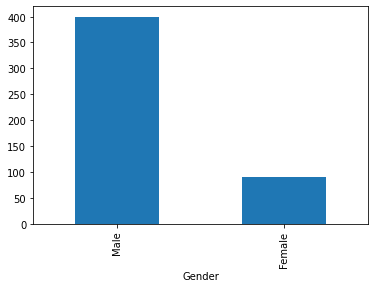

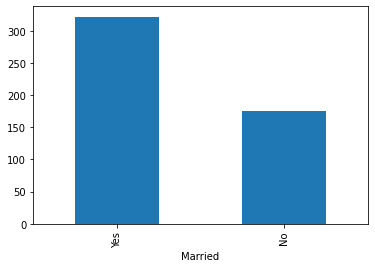

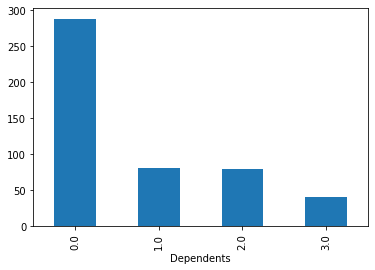

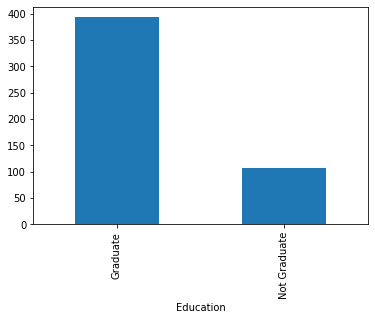

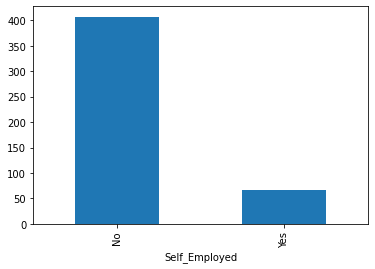

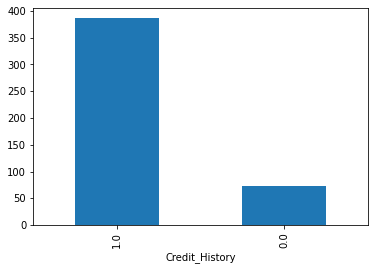

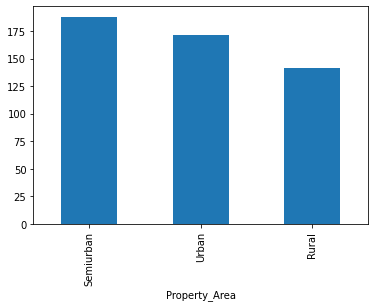

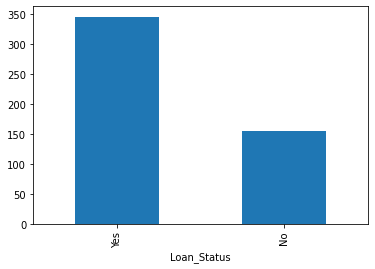

In [17]:
for col in cate_cols :
    loan_df[col].value_counts().plot.bar()
    plt.xlabel(col)
    plt.show()

Ta thấy các dữ liệu dạng categorical khá ổn và giống với mô tả về tập dữ liệu.

## Với mỗi cột dữ liệu dạng numerical, các giá trị được phân bố như thế nào?

Ta tiến hành tính các thông số missing_ratio (tỉ lệ phần trăm các giá trị thiếu), mean, min, median, max.

- Các cột `Dependents`, `Loan_Amount_Term` và `Credit_History` chỉ gồm một số giá trị cố định (quá trình thống kê sẽ không khả quan), nên ta sẽ không xét các cột đó trong quá trình thống kê. Ta tiến hành lấy các cột có nhiều hơn 10 giá trị khác nhau để xem phân bố giá trị của các cột đó.

In [18]:

nume_cols = loan_df.columns[loan_df.nunique() > 9]
nume_cols = loan_df[nume_cols]
nume_cols_info = nume_cols.agg([missing_ratio,'mean', 'std', 'min','median','max'])
nume_cols_info

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
missing_ratio,0.000000,0.000000,3.600000,2.800000,0.000000
mean,5493.644000,1506.307840,144.020747,342.543210,6999.951840
std,6515.668972,2134.432188,82.344919,63.834977,6605.759256
min,150.000000,0.000000,17.000000,12.000000,1442.000000
median,3854.000000,1125.500000,126.500000,360.000000,5332.500000
max,81000.000000,20000.000000,700.000000,480.000000,81000.000000


Ta sẽ tiến hành trực quan hoá dữ liệu dạng numeric xem có gì bất thường không.

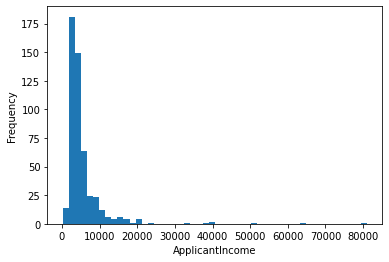

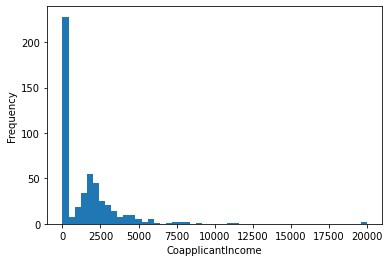

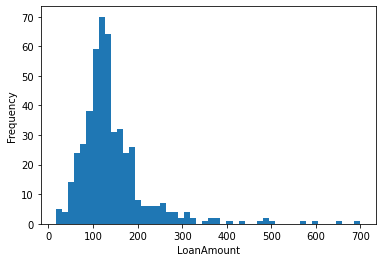

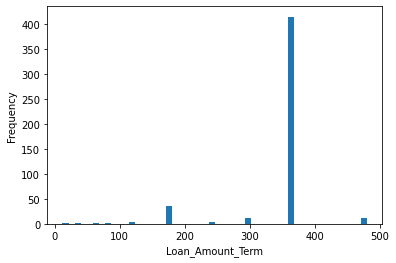

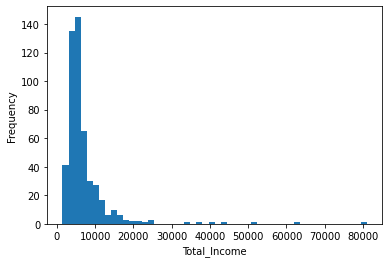

In [19]:
for col in nume_cols:
    loan_df[col].plot.hist(bins=50)
    plt.xlabel(col)
    plt.show()

Ta nhận thấy outlier của các **cột dữ liệu numerical** khá là kinh dị và sẽ rất tệ nếu ta không xử lý chúng.

## Tiếp tục tiền xử lý cho các cột numerical

### Xóa outlier như thế nào?

- Quan sát biểu đồ được trực quan hóa, ta có thể thấy giá trị của cột cột có dạng phân phối chuẩn (theo kinh nghiệm nhìn biểu đồ nhiều).
- Theo định luật Empirical : https://www.investopedia.com/terms/e/empirical-rule.asp
- 99.7% dữ liệu nằm trong khoảng [mean - 3*std , mean + 3 *std], những phần còn lại nằm ngoài khoảng này đều là linh tinh hết (outlier).

In [20]:
def notOutlierRange(s):
    _mean = s.mean()
    _std = s.std()
    return (_mean - 3 * _std , _mean + 3* _std)

Test hàm

In [21]:
notOutlierRange(loan_df.Loan_Amount_Term)

(151.03827826480864, 534.0481414882777)

### Đợi đã, việc xóa này có ảnh hưởng đến tính trực quan của dữ liệu không?

Đầu tiên, ta sẽ xem số outlier bị loại bỏ có nhiều không bằng cách tính tỉ lệ outlier có trong từng cột

In [22]:
for col in nume_cols:
    front,rear = notOutlierRange(loan_df[col])
    s = loan_df[col]
    before = len(s)
    #print(
    after = len(s.loc[(s > front) & (s < rear)])
    print(col)
    print("{}%".format(((before-after)/after)*100))

ApplicantIncome
1.4198782961460445%
CoapplicantIncome
1.4198782961460445%
LoanAmount
5.932203389830509%
Loan_Amount_Term
4.821802935010482%
Total_Income
1.4198782961460445%


Các cột trên hầu chỉ chỉ có 1.4 %, không đáng quan ngại. Nhưng cột `LoanAmount` lên tới ~6% !  
Hãy cùng xem tìm chuyện gì sẽ xảy ra nếu ta loại bỏ tất cả outlier. 

In [23]:
loan_df_copy = copy.deepcopy(loan_df)
for col in nume_cols:
    front,rear = notOutlierRange(loan_df_copy[col])
    loan_df_copy = loan_df_copy.drop(loan_df_copy[~((loan_df_copy[col] > front) & (loan_df_copy[col] < rear))].index)
(1 - (loan_df_copy.shape[0]/loan_df.shape[0]))*100

15.200000000000003

Sau khi loại bỏ tất cả outlier thì dữ liệu giảm đi 15%, con số này có vẻ không đáng quan ngại.

Ta tiến hành tạo bản copy của `loan_df` để xem tình hình ra sao.

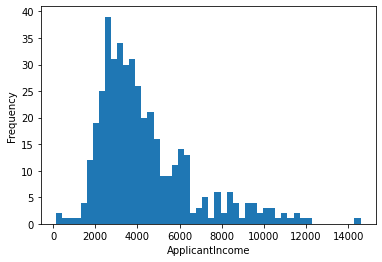

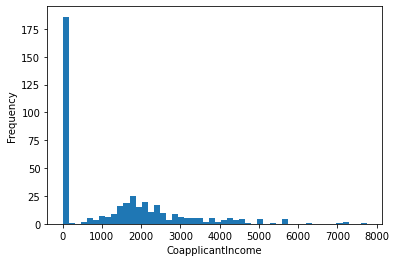

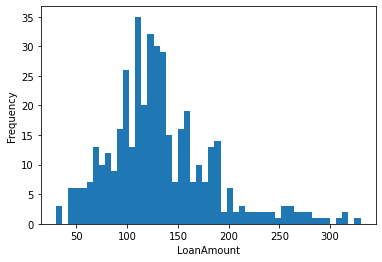

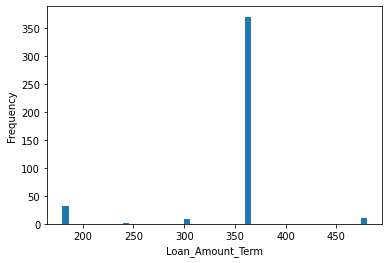

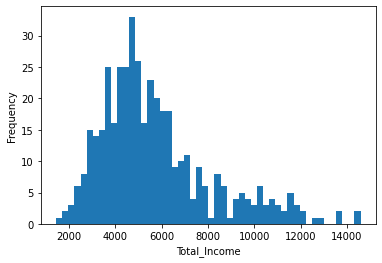

In [24]:
for col in nume_cols:
    loan_df_copy[col].plot.hist(bins=50)
    plt.xlabel(col)
    plt.show()

Có vẻ khả quan, ta tiến hành bỏ outliers trên `loan_df`

In [25]:
loan_df = loan_df_copy
# loan_df = loan_df.reset_index(drop=True)
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,No,6091.0
2,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Yes,3000.0
3,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Yes,4941.0
4,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Yes,6000.0
5,Male,Yes,2.0,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Yes,9613.0


# Câu hỏi : Những yếu tố nào ảnh hướng đến **Tổng thu nhập** của từng người?

Một câu hỏi cực kì thú vị mà nếu trả lời được thì trong một số trường hợp nếu ta cần đoán thu nhập của một người nào đó thì có thể dùng những dữ liệu dễ có hơn để từ đó suy ra người này có thu nhập cao hay thấp.  
Một ví dụ thực tế : trong đời sống ta nếu ta biết một người có tốt nghiệp (trong trường hợp data này là cột `Education`) thì ta sẽ đoán rằng người này sẽ có thu nhập cao hơn những người không có bằng cấp. Từ đó, ta sẽ có những quyết định đúng đắn như làm quen, tạo mối quan hệ (thấy sang bắt quàng làm họ) chẳng hạn, hoặc gạ hỏi có muốn mua nhà mua đất không,...?  
Tất nhiên là tri thức ở ví dụ trên chỉ là ví dụ ;-) . Chúng ta hãy cùng đi kiểm chứng để trả lời câu hỏi này nhé. 

## Tiền xử lý cho câu hỏi

### Có dòng nào thu nhập là null không?

Vì trung tâm của câu hỏi là Cột `ApplicantIncome`,tức thu nhập cá nhân nên những dòng nào thiếu dữ liệu thu nhập cá nhân sẽ bị loại bỏ. Ta tiến hành kiểm tra xem có dòng nào bị thiếu như vậy không.

In [26]:
loan_df['ApplicantIncome'].isnull().any()

False

Hên quá không có dòng nào thiếu hết :-)

### Chuyển cột `Loan_Amount_Term`

Ta nhận thấy sau khi loại bỏ outlier thì cột `Loan_Amount_Term` quá ít loại dữ liệu nên ta sẽ chuyển nó sang dạng categories.

In [27]:
try:
    nume_cols = nume_cols.drop(columns="Loan_Amount_Term")
except:
    pass
try:
    cate_cols["Loan_Amount_Term"] = loan_df["Loan_Amount_Term"]
except:
    pass
cate_cols.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term
0,Male,No,0.0,Graduate,No,1.0,Urban,Yes,NaN
1,Male,Yes,1.0,Graduate,No,1.0,Rural,No,360.0
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,Yes,360.0
3,Male,Yes,0.0,Not Graduate,No,1.0,Urban,Yes,360.0
4,Male,No,0.0,Graduate,No,1.0,Urban,Yes,360.0


## Cột numeric

Vì số lượng cột số khá ít nên bọn em sẽ trực quan hoá mối liên hệ giữa từng cột numeric với tổng thu nhập.

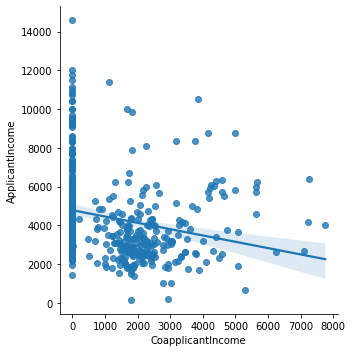

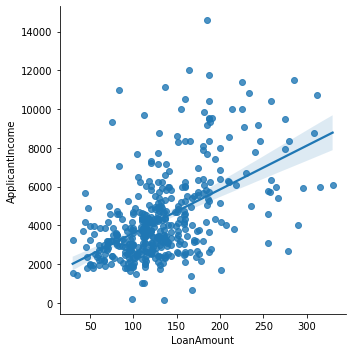

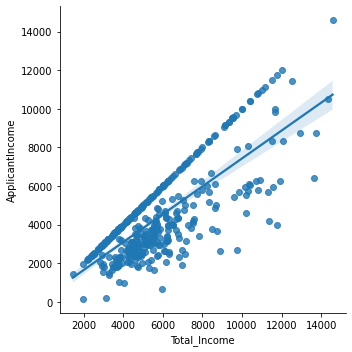

In [28]:
for col in nume_cols:
    if col == "ApplicantIncome":
        continue
    sns.lmplot(x=col,y='ApplicantIncome',data=loan_df[[col,"ApplicantIncome"]],fit_reg=True)


- Hai cột income cộng lại bằng cột income tổng (đã khám phá ra ở bước khám phá dữ liệu). Ta cũng có thể thấy sự tỉ lệ thuận của hai cột này với TotalIncome.
- Cột LoanAmount có vẻ tỉ lệ thuận với thu nhập cá nhân.  
==> Ta có kết luận khá thú vị : người càng có thu nhập thì vay tiền càng nhiều.
- Với cột CoapplicantIncome, ta nhận thấy có rất nhiều người đi vay mà không có đối tác, vì vậy nên biểu đồ nhìn không được trực quan cho lắm...  


### Trực quan riêng cột CopplicantIncome

Thật ra bọn em tính để phần xử lý này lên khúc tiền xử lý phía trên. Tuy nhiên, làm như vậy thì không thể hiện rõ được cái flow làm việc của bọn em một cách chân thật nhất :tiền xử lý -> đặt vấn đề -> giải quyết -> tạo vấn đề mới -> giải quyết -> ...

Trước khi tiến hành, bọn em sẽ loại bỏ những dòng có CoaplicantIncome bằng 0, tức những người không có đối tác trong hợp đồng vay.  
Lý do bọn em làm như vậy vì : mục đích của việc so sánh 2 cột này là thấy được giữa thu nhập của cá nhân của 1 người so với thu nhập của đối tác người đó, nếu người đó không có đối tác thì lấy gì mà so sánh?

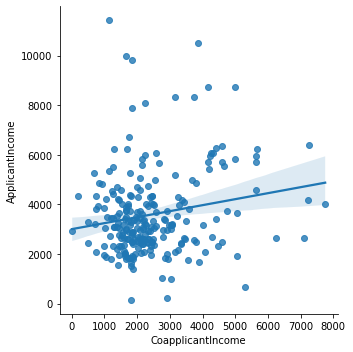

In [29]:
have_coapplicant_df = loan_df[loan_df['CoapplicantIncome'] != 0]
have_coapplicant_df
col = 'CoapplicantIncome'
sns.lmplot(x=col,y='ApplicantIncome',data = have_coapplicant_df[[col,'ApplicantIncome']],fit_reg=True)

Thật đáng buồn là không có thông tin gì được rút trích từ biểu đồ này cả :'(

## Cột categories

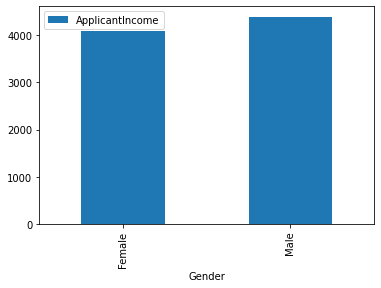

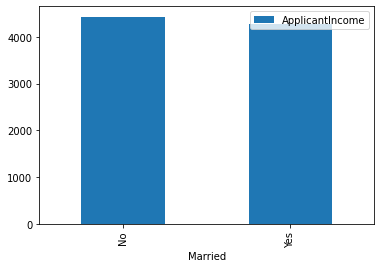

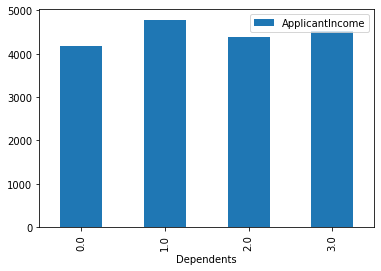

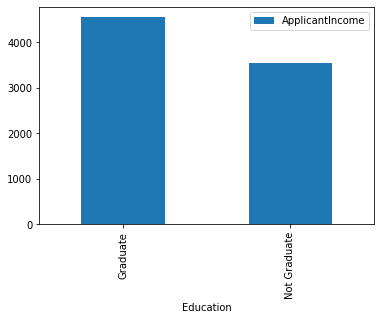

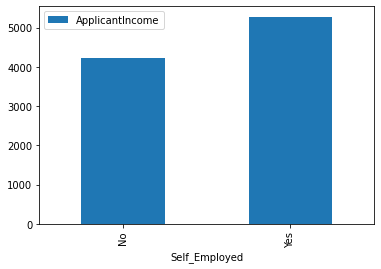

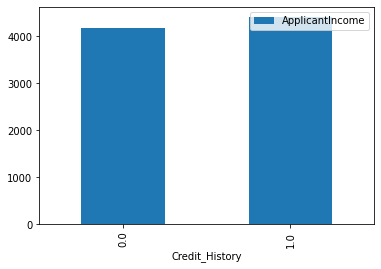

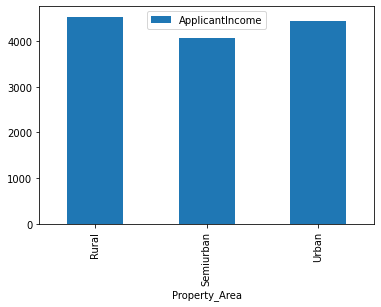

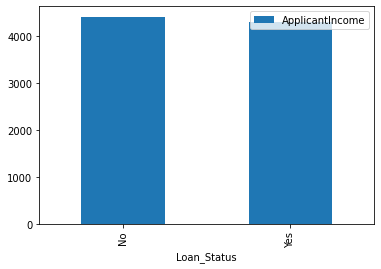

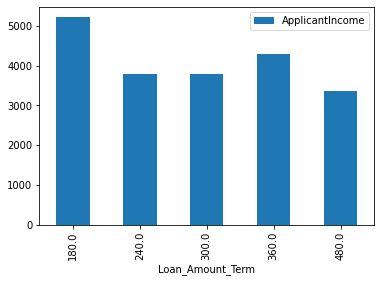

In [30]:
_compare = []
for col in cate_cols:
    _compare.append(loan_df[[col,"ApplicantIncome"]].groupby(col).mean())
    _compare[-1].plot.bar()
    plt.show()

Như vậy là ta đã có được những yếu tố ảnh hưởng đến tổng thu nhập của một cá nhân như : giới tính, hôn nhân, self-employ,...  
- Nam có thu nhập nhiều hơn nữ  
- Sau khi kết hôn, thu nhập giảm nhẹ.
- Càng gần trung tâm (tức mức độ đô thị hoá cao) thì càng có thu nhập cao.  
- Người có bằng cấp thì thu nhập cao hơn.  
- Người làm công (tức không phải self-employed) thì thu nhập thấp hơn.  

Tuy nhiên, bọn em khá tò mò về hai đặc trưng khá là liên quan nhau : giới tính và kết hôn. Liệu rằng Income của một giới sẽ thay đổi như nào trước khi kết hôn và sau khi kết hôn? Ví dụ như liệu rằng thu nhập của nữ có tăng lên (thu tiền lương của chồng) hay thu nhập của nam sẽ giảm xuống (điều ngược lại).

Để trả lời, bọn em sẽ dùng kĩ thuật gom nhóm (hay còn gọi là groupby, một kỹ thuật rất hay bọn em **học được của thầy Kiên**) dựa vào giới tính vào tình trạng hôn nhân và tính trung bình thu nhập của từng nhóm.

In [31]:
gender_married = loan_df.groupby(["Gender","Married"]).mean()["ApplicantIncome"]

<AxesSubplot:xlabel='Gender,Married'>

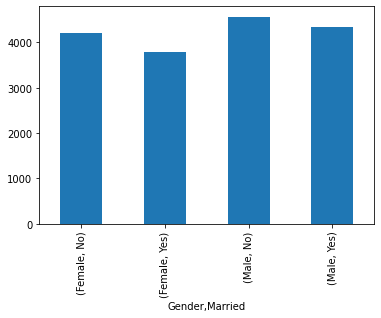

In [32]:
gender_married.plot.bar()

Có vẻ nam và nữ đều giảm mức thu nhập bình quân nếu so với nhóm chưa kết hôn. 
Ta tiến hành so sánh sự chệnh lệnh trước và sau hôn nhân của nam và nữ (tăng lên bao nhiêu %).  
Ở đây, bọn em sử dụng kỹ thuật thay đổi shape của dataframe (một kỹ thuật rất hay bọn em học được của thầy Kiên).

In [33]:
gender_married_diff = gender_married.unstack(1).T
(gender_married_diff.loc['Yes'].subtract(gender_married_diff.loc['No'])).divide(gender_married_diff.loc['No'])*100

Gender
Female   -10.284310
Male      -4.991731
dtype: float64

Có vẻ như sau khi tiến đến hôn nhân, thu nhập của phái nữ giảm mạnh hơn so với nam (gấp 2 lần)  
Lý do là gì nhỉ? Có thể do phái nữ sau khi kết hôn thì đi làm ít hơn nên lương ít hơn chăng?  
Còn đàn ông tại sao lại giảm thu nhập?
Có quá ít dữ liệu để có thể phân tích cho những câu hỏi này nên em quyết định dừng tại đây.

## Trả lời cho câu hỏi ban đầu
Như vậy, ta đã có câu trả lời cho câu hỏi đưa ra từ đầu : 
- Càng vay nhiều tiền thì thu nhập càng cao
- Nam có thu nhập nhiều hơn nữ
- Khi kết hôn, thu nhập giảm
- Sau khi kết hôn, thu nhập phụ nữ giảm mạnh hơn đàn ông (gấp 2 lần). Chưa kết luận được lý do, nhưng có thể do phụ nữ làm ít đi để lo việc nhà cửa. 
- Càng gần trung tâm (tức mức độ đô thị hoá cao) thì càng có thu nhập cao.
- Người có bằng cấp thì thu nhập cao hơn.
- Người làm công (tức không phải self-employed) thì thu nhập thấp hơn.  

Tuy nhiên, hai biến với nhau cũng không thể kết luận là có quan hệ nhân quả. Bọn em chỉ có thể đưa ra những ý tưởng, còn việc kiểm chứng thì phải cần nhiều nỗ lực lẫn dữ liệu hơn (điều mà không bao gồm trong khuôn khổ đồ án này).

# Mô hình phân lớp

Trong quá trình học, thầy Kiên đã dạy bọn em kiến thức rất hữu ích về numpy mà nếu không dùng trong đồ án cuối kỳ này sẽ là một sự lãng phí.  
Tuy nhiên, do thời gian có hạn nên bọn em sẽ tái sử dụng mã nguồn (ở môn Data mining) do chính bọn em code. Thật may mắn khi bọn em đã được thầy dạy numpy nên làm đồ án của môn này rất suôn sẻ.

## Class cây quyết định

Đầu tiên ta sẽ định nghĩa một hàm trả về Entrophy (chỉ số hỗn loạn của thông tin).  
Chỉ số hỗn loạn của thông tin cho biết độ tinh khiết của tập dữ liệu có được. Tập dữ liệu càng thống nhất thì chỉ số hỗn loạn càng ít, tức nhìn vào tập dữ liệu đó càng dễ đoán được tập dữ liệu thuộc lớp nào. Nói lý thuyết hơi khó hiểu, hãy đọc ví dụ bên dưới rồi nghiệm lại lý thuyết xem nào.  
Lấy ví dụ : trong chuyện cổ tích Tấm Cám, khi dì ghẻ trộn đậu xanh đậu đỏ lại với nhau trong 1 cái rổ, khi đó ta nói cái rổ có độ hỗn loạn cao vì nếu bốc đại một hạt ngẫu nhiên thì rất khó biết đó sẽ là đậu xanh hay đậu đỏ. Còn khi bụt đã cho chim sẻ phân lớp cái rổ đó ra thành hai rổ đậu xanh và đậu đỏ thì hai cái rổ đó có độ hỗn loạn thấp vì mỗi rỗ chỉ chứa 1 loại đậu, khi bốc đại 1 hạt ở giỏ thì khả năng cao sẽ biết được đó là hạt đậu xanh hay đậu đỏ.  
Công thức của hàm etrophy là : sum (p_i * log(p_i)) với i là class trong tập dữ liệu.

In [106]:
def get_entrophy(y,returnMaxCount = False):
    unique,count = np.unique(y,return_counts=True)
    p = count/len(y)
    if returnMaxCount == False:
        return -np.sum(p*np.log(p))
    else:
        return -np.sum(p*np.log(p)),unique[count==np.max(count)][0],np.max(count)

Ta tiến hành tính entrophy cho từng cột. Tập dữ liệu sẽ phân ra nhiều tập con dựa theo một feature được định sẵn. Sau đó, ta sẽ tính tổng chỉ số entrophy của các tập con đó.  

In [ ]:
def get_entrophy_col(X,y,col_index):
    X_col = X[:,col_index]
    res = 0
    N = len(y)
    unique,counts = np.unique(X_col,return_counts=True)
    for value,count in zip(unique,counts):
        #print(value,count,get_entrophy(y[X_col==value]))
        res += (count/N)* get_entrophy(y[X_col==value])
    return res

Dựa vào hàm trên, ta xem feature nào cho ra tổng entrophy thấp nhất.  

In [ ]:
def find_best_col(X,y):
    min_entrophy = float('inf')
    best_col = -1
    for col in range(X.shape[1]):
        entrophy = get_entrophy_col(X,y,col)
        if min_entrophy > entrophy:
            min_entrophy = entrophy
            best_col = col
    return best_col,min_entrophy

Sơ qua về mô hình tạo cây phân lớp : mỗi tập dữ liệu sẽ là một node. Nếu tập dữ liệu đó có độ hỗn loạn ở mức chấp nhận được thì dừng. Nếu không thì chia nhỏ ra thành các node con bằng cách tìm ra cột để phân chia tốt nhất bằng hàm ở trên.  

In [228]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from anytree.importer import DictImporter
from anytree import RenderTree
class DecisionTree:
    def __init__(self,threshold=1.0):
        self.root = {}
        self.threshold=threshold
        #node is a dictionary :
# ╔═══════════════════════╦════════════════════════════════════════════════╗
# ║ key                   ║ ý nghĩa                                        ║
# ╠═══════════════════════╬════════════════════════════════════════════════╣
# ║ children              ║ list chứa các node con                         ║
# ╠═══════════════════════╬════════════════════════════════════════════════╣
# ║ col_index             ║ chứa chỉ số cột dùng để phân chia              ║
# ╠═══════════════════════╬════════════════════════════════════════════════╣
# ║ col_val               ║ gíá trị nhận được của cột được chọn ở node cha ║
# ╠═══════════════════════╬════════════════════════════════════════════════╣
# ║ result(leafnode only) ║ kết quả phân lớp cuối cùng                     ║
# ╚═══════════════════════╩════════════════════════════════════════════════╝
    def fit(self, X_train, y_train):
        self.root = {}
        self.fit_recur(X_train,y_train,self.root)
    def fit_recur(self, X_train, y_train,node={}):
        if(np.all(y_train==y_train[0])):
            node ['result']=y_train[0][0]
            return
        y_entrophy,popular_value,maxcount = get_entrophy(y_train,returnMaxCount=True)
        #print(maxcount/len(y_train))
        if maxcount/len(y_train)>self.threshold:
            node['result'] = popular_value
            return
        node['col_index'],entrophy=find_best_col(X_train,y_train)
        #print(y_entrophy,entrophy)
        if(y_entrophy - entrophy<0.01):
            node['result'] = popular_value
            return
        node['children']=[]
        for val in set(X_train[:,node['col_index']]):
            child_node = {}
            child_node['col_val'] = val
            row_to_train = X_train[:,node['col_index']]==val
            self.fit_recur(X_train[row_to_train],y_train[row_to_train],child_node)
            node['children'].append(child_node)
    def predict(self, X_test):
        y = []
        for i,x in enumerate(X_test):
            y.append(self._predict(x))
        return np.array(y)
    def _predict(self,X):
        node = self.root
        unk = 0
        while('children' in node): #còn có node con
            unk = 1
            for child in node['children']:
                if(X[node['col_index']]==child['col_val']):
                    node = child
                    unk = 0
                    break
                
            if unk:
                return 'unknown'
        return node['result']
    def visualize(self):
        importer = DictImporter()
        root = importer.import_(self.root)
        print(RenderTree(root))

## Tiền xử lý cho mô hình

Lấy những cột feature trong dataframe. Tuy nhiên, do thời gian có hạn nên bọn em chưa kịp code xử lý những cột dạng numeric (dù có ý tưởng, nhóm sẽ trình bày bên dưới).  
Nên bọn em sẽ chỉ lấy những cột có dạng categories (là những cột có só giá trị phân biệt bé hơn 9). 
Đồng thời, giá trị NaN sẽ được coi là một giá trị, nhóm sẽ đổi những giá trị NaN thành `unknown`.  
Những giá trị Nan trong những cột định dạng số (nhưng bản chất là categories, cụ thể là `Dependents` và `Credit_History`) sẽ được gán cho giá trị `-1`.

Tất cả sẽ được biểu diễn dưới dạng numpy array.  
Lý do bọn em chọn numpy array thay cho dataframe vì nó có tốc độ gần ngang với array thuần C (hình như thấy Kiên có nói :D).

In [183]:
cate_cols = loan_df.columns[loan_df.nunique() <= 9]
cate_cols = loan_df[cate_cols]
X = cate_cols.fillna('unknown')
X['Dependents'] = X['Dependents'].replace({'unknown':-1})
X['Credit_History'] = X['Credit_History'].replace({'unknown':-1})
X = np.array(X)
X = X[:,:-1]

Lấy cột label từ loan_df đã qua xử lý rồi chuyển nó về numpy array.  

In [184]:
y = loan_df['Loan_Status'].reset_index().drop(columns=['index'])
y = np.array(y)

424

Phân chia tập train và test. Đây là bước quan trọng trong học máy. Bạn đọc chỉ cần hiểu là mô hình sẽ huấn luyện và thử nghiệm trên mô hình khác nhau để khách quan việc huấn luyện.  

In [304]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=3/10,random_state=156+212)

Huấn luyện mô hình rồi coi mô hình tính dựa vào cái gì để biết một người có được vay hay không.  

In [305]:
tree = DecisionTree()
tree.fit(X_train,y_train)
print(cate_cols.columns)
tree.visualize()

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
AnyNode(col_index=6)
├── AnyNode(col_index=3, col_val=0.0)
│   ├── AnyNode(col_val='Not Graduate', result='No')
│   └── AnyNode(col_index=5, col_val='Graduate')
│       ├── AnyNode(col_index=0, col_val=360.0)
│       │   ├── AnyNode(col_val='unknown', result='No')
│       │   ├── AnyNode(col_index=1, col_val='Male')
│       │   │   ├── AnyNode(col_index=2, col_val='Yes')
│       │   │   │   ├── AnyNode(col_val=0.0, result='No')
│       │   │   │   ├── AnyNode(col_val=1.0, result='No')
│       │   │   │   ├── AnyNode(col_val=2.0, result='No')
│       │   │   │   └── AnyNode(col_index=7, col_val=3.0)
│       │   │   │       ├── AnyNode(col_val='Semiurban', result='No')
│       │   │   │       └── AnyNode(col_val='Urban', result='Yes')
│       │   │   └── AnyNode(col_index=2, col_val='No')
│       │   │       ├── AnyNod

Ồ, có vẻ khá là phức tạp, nhìn sơ qua thì cột `Credit_History`, tức cột số 6 sẽ được đem ra để xem xét trước, ta có thể tạm kết luận đây là đặc trưng quan trọng nhất, ảnh hưởng nhiều nhất đến việc xét coi người này có được vay hay không.  

Quan sát kĩ hơn một chút (nhưng vẫn chỉ ở mức độ sơ sơ), ta thấy nếu một người có lịch sử tín dụng, thì ngân hàng sẽ xét đến coi người này ở đâu : thành thị, nông thôn hay thị xã? Còn nếu chưa có lịch sử tín dụng thì sẽ đến trình độ học vấn. Còn nếu thông tin chưa có thì chuyển sang giới tính (???).  



Trong trường hợp cây phân lớp không thể đưa ra dự đoán (đến node lá nhưng không có nhánh thuộc giá trị của feature của vector X đang xét) thì sẽ cho ra kết quả unknown.  
Do ý đồ ban đầu của nhóm nên nếu không dự đoán được thì bỏ qua, không tính vào lỗi sai của mô hình.  
Vì vậy, khi đánh giá, nhóm sẽ loại bỏ những kết quả `unknown` (bằng những kỹ thuật numpy rất hay của thầy Kiên)

In [310]:
y_pred = tree.predict(X_val)
unknown_col = (y_pred == 'unknown')
print(accuracy_score(y_val[~unknown_col],y_pred[~unknown_col]))
#print(accuracy_score(y_val,y_pred))


0.7317073170731707


Một vài cột sample

In [309]:
pd.DataFrame(y_val[~unknown_col],y_pred[~unknown_col]).sample(10)

,0
Yes,Yes
Yes,Yes
No,Yes
Yes,Yes
Yes,Yes
Yes,Yes
No,Yes
Yes,Yes
Yes,Yes
Yes,Yes
